In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

In [2]:
%%sql
SELECT *
FROM sqlite_master
WHERE type='table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


In [3]:
%%sql
SELECT *
FROM facts
LIMIT 5;

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
%%sql
SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
FROM facts;

 * sqlite:///factbook.db
Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,7256490011,0.0,4.02


In [5]:
%%sql
SELECT name, population 
FROM facts
WHERE population = 0;

 * sqlite:///factbook.db
Done.


name,population
Antarctica,0


In [6]:
%%sql
SELECT name, population 
FROM facts
WHERE population = (SELECT MAX(population) FROM facts);

 * sqlite:///factbook.db
Done.


name,population
World,7256490011


In [7]:
%%sql
SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
FROM facts
WHERE name != 'World';

 * sqlite:///factbook.db
Done.


MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,1367485388,0.0,4.02


In [8]:
%%sql
SELECT AVG(population), AVG(area)
FROM facts;

 * sqlite:///factbook.db
Done.


AVG(population),AVG(area)
62094928.32231405,555093.546184739


In [9]:
%%sql
SELECT *
FROM facts
WHERE population > (SELECT AVG(population) FROM facts) & area < (SELECT AVG(area) )

 * sqlite:///factbook.db
(sqlite3.OperationalError) misuse of aggregate: AVG()
[SQL: SELECT *
FROM facts
WHERE population > (SELECT AVG(population) FROM facts) & area < (SELECT AVG(area) )]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [11]:
no_of_a_countries = %sql SELECT COUNT(name) FROM facts WHERE name LIKE 'A%'
no_of_a_countries

 * sqlite:///factbook.db
Done.


COUNT(name)
19


In [14]:
a_countries = %sql SELECT * FROM facts WHERE name LIKE 'A%'
a_countries = a_countries.DataFrame()
a_countries

 * sqlite:///factbook.db
Done.


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436.0,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886.0,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382.0,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014.0,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550.0,0.55,9.41,9.42,5.56


In [15]:
type(a_countries)

pandas.core.frame.DataFrame

In [17]:
#sort a_countries by population
a_countries.sort_values("population", ascending=False)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886.0,0.93,16.64,7.33,0.00
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014.0,1.07,12.15,7.14,5.65
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46
10,11,aj,Azerbaijan,86600.0,82629.0,3971.0,9780780.0,0.96,16.64,7.07,0.00
9,10,au,Austria,83871.0,82445.0,1426.0,8665550.0,0.55,9.41,9.42,5.56
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382.0,0.15,13.61,9.34,5.80
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
12,216,aa,Aruba,180.0,180.0,0.0,112162.0,1.33,12.56,8.18,8.92


 * sqlite:///factbook.db
Done.


<BarContainer object of 13 artists>

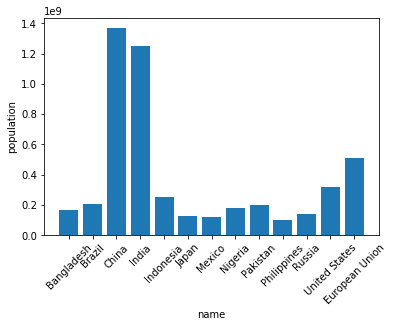

In [22]:
above_100m = %sql SELECT name, population FROM facts WHERE population BETWEEN 100000000 AND 1500000000

%matplotlib inline

above_100m.bar()